In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
def get_columns_to_show(dataset, prefix=''):
    if prefix:
        columns_to_show = [x for x in dataset.columns if prefix in x]
    else:
        columns_to_show = dataset.columns    
    return columns_to_show
        

In [3]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [34]:
train.describe(include=['object'])

,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK
count,78376,76973,66965,50535,237303,64649,76839,64649,64648,68272,75998,75998,399589
unique,22,13,5,4,20248,2,17,2,2,4,4,4,12
top,FRIEND,M,SO,SPECIALIST,ДИРЕКТОР,N,H,N,N,SPECIALIST,PRIVATE,PRIVATE,102
freq,28171,34664,31669,28383,12636,40963,47864,59556,37049,41304,66695,66695,131707


In [4]:
train = pd.read_csv('laba04_train.csv')

In [5]:
train = train.drop([    'ID', 
                        'Unnamed: 0',
                        'CLNT_JOB_POSITION',
                        'CR_PROD_CNT_IL',
                        'PRC_ACCEPTS_A_EMAIL_LINK',
                        'APP_REGISTR_RGN_CODE',
                        'PRC_ACCEPTS_A_POS',
                        'PRC_ACCEPTS_A_TK',
                        'CNT_TRAN_AUT_TENDENCY1M',
                        'SUM_TRAN_AUT_TENDENCY1M',
                        'PRC_ACCEPTS_A_AMOBILE',
                        'SUM_TRAN_AUT_TENDENCY3M',
                        'PRC_ACCEPTS_TK',
                        'PRC_ACCEPTS_A_MTP',
                        'CNT_TRAN_AUT_TENDENCY3M',
                        'CNT_ACCEPTS_TK',
                        'REST_DYNAMIC_SAVE_3M',
                        'CR_PROD_CNT_VCU',
                        'CNT_TRAN_MED_TENDENCY1M',
                        'TRANS_COUNT_SUP_PRC',
                        'CNT_TRAN_CLO_TENDENCY1M',
                        'PRC_ACCEPTS_A_ATM',
                        'PRC_ACCEPTS_MTP',
                        'TRANS_COUNT_NAS_PRC',
                        'CNT_ACCEPTS_MTP',
                        'CR_PROD_CNT_TOVR',
                        'SUM_TRAN_CLO_TENDENCY1M',
                        'CR_PROD_CNT_CC',
                        'SUM_TRAN_MED_TENDENCY3M',
                        'LDEAL_YQZ_CHRG',
                        'CR_PROD_CNT_CCFP',
                        'DEAL_YQZ_IR_MAX',
                        'LDEAL_YQZ_COM',
                        'DEAL_YQZ_IR_MIN',
                        'CNT_TRAN_CLO_TENDENCY3M',
                        'LDEAL_TENOR_MIN',
                        'LDEAL_GRACE_DAYS_PCT_MED',
                        'CNT_TRAN_SUP_TENDENCY3M',
                        'CNT_TRAN_ATM_TENDENCY3M',
                        'TURNOVER_DYNAMIC_IL_3M',
                        'SUM_TRAN_ATM_TENDENCY3M',
                        'DEAL_GRACE_DAYS_ACC_S1X1',
                        'DEAL_YWZ_IR_MIN',
                        'DEAL_YWZ_IR_MAX',
                        'DEAL_GRACE_DAYS_ACC_AVG',
                        'DEAL_GRACE_DAYS_ACC_MAX',
                        'TURNOVER_DYNAMIC_PAYM_3M',
                        'LDEAL_DELINQ_PER_MAXYQZ',
                        'CLNT_SALARY_VALUE',
                        'MED_DEBT_PRC_YQZ',
                        'LDEAL_USED_AMT_AVG_YQZ',
                        'LDEAL_USED_AMT_AVG_YWZ',
                        'TURNOVER_DYNAMIC_CC_1M',
                        'MED_DEBT_PRC_YWZ',
                        'LDEAL_DELINQ_PER_MAXYWZ',
                        'TURNOVER_DYNAMIC_CC_3M',
                        'LDEAL_ACT_DAYS_PCT_TR4',
                        'APP_TRAVEL_PASS',
                        'APP_CAR',
                        'APP_DRIVING_LICENSE',
                        'APP_KIND_OF_PROP_HABITATION',
                        'APP_EMP_TYPE',
                        'APP_POSITION_TYPE',
                        'CLNT_JOB_POSITION_TYPE',
                        'APP_COMP_TYPE',
                        'APP_MARITAL_STATUS',
                        'CLNT_TRUST_RELATION',
                        'APP_EDUCATION',
                        'PACK', 'MAX_PCLOSE_DATE', 'SUM_TRAN_MED_TENDENCY1M'], axis=1)

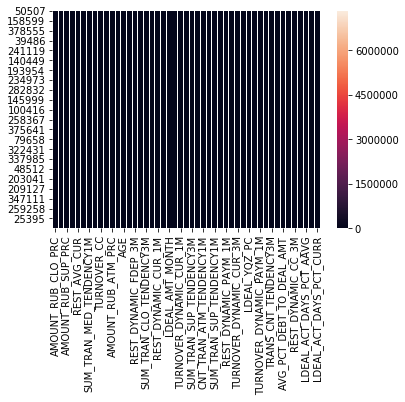

In [118]:
import seaborn as sns
sns.heatmap(X_train)
sns.pairplot(train, hue="TARGET", vars=["AGE", "REST_AVG_CUR", "REST_AVG_PAYM"])

In [77]:
# Средние обороты по кредитным картам и зарплатным счетам (TURNOVER_PAYM)
# заполнение медианой нулевых значений - неправильно
# видимо, нужно только нормализовать значения
# и, возможно,
# сделать новые фичи - есть кредит-карта и есть зарплатный счет 

# Масштабирование выборки – из признака вычесть его среднее 
# и поделить на стандартное отклонение

scaler = StandardScaler()
train[get_columns_to_show(train, 'TURNOVER')] = \
                   scaler.fit_transform(train[get_columns_to_show(train, 'TURNOVER')])

In [78]:
# Тренд среднемесяцных остатков по продуктам за отчетный период ( за 1 или 3 месяца)
train[get_columns_to_show(train, 'REST_')] = \
                   train[get_columns_to_show(train, 'REST_')].fillna(0)
scaler = StandardScaler()
train[get_columns_to_show(train, 'REST_AVG_')] = \
                   scaler.fit_transform(train[get_columns_to_show(train, 'REST_AVG_')])

In [6]:
train = train.fillna(0)

In [7]:
y = train.TARGET
train = train.drop(["TARGET"], axis=1)

In [8]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train, 
    y, 
    test_size=0.33,
    random_state=42)

/Users/ssv/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
# ROC AUC 0.75283557180878979 - 0.75575844393698677 - 0.83819547948035167 - 0.83866660075959798
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=20, n_jobs=-1)
# from sklearn.ensemble import GradientBoostingClassifier
# rfc = GradientBoostingClassifier(n_estimators=100)
rfc.fit(X_train, y_train) 
pred = rfc.predict_proba(X_test)

In [22]:
X_selected = rfc.transform(X_train, threshold=0.25)

AttributeError: 'RandomForestClassifier' object has no attribute 'transform'

In [23]:
importances = rfc.feature_importances_

features = {}
for f in range(X_train.shape[1]):    
    features[col[f]] = importances[f]
    print(col[f] + ' ---', importances[f])
    print('----------------------------------------------------------')
    if importances[f] == 0.0:
        print('\'' + col[f] + '\'' + ',')


NameError: name 'col' is not defined

In [24]:
with open('features.csv', 'w') as file:
    for item in features.items():
        file.write(item[0].strip() + '\t' + str(item[1]).strip() + '\n')

In [114]:
X_train.to_csv('X_train.csv')

In [16]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
metrics.auc(fpr, tpr)

0.84868235597458375

In [85]:
metrics.roc_auc_score(y_test, pred[:,1])

0.83419696682095834

In [115]:
matplotlib inline

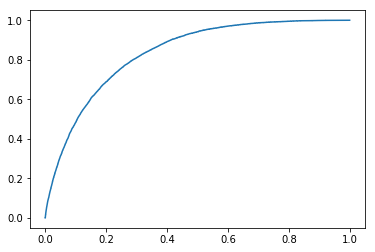

In [117]:
from matplotlib import pyplot as plt
plt.plot(fpr, tpr)

In [70]:
train.shape

(399589, 47)

In [ ]:
train.head(20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a15a68828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a195570b8>]], dtype=object)

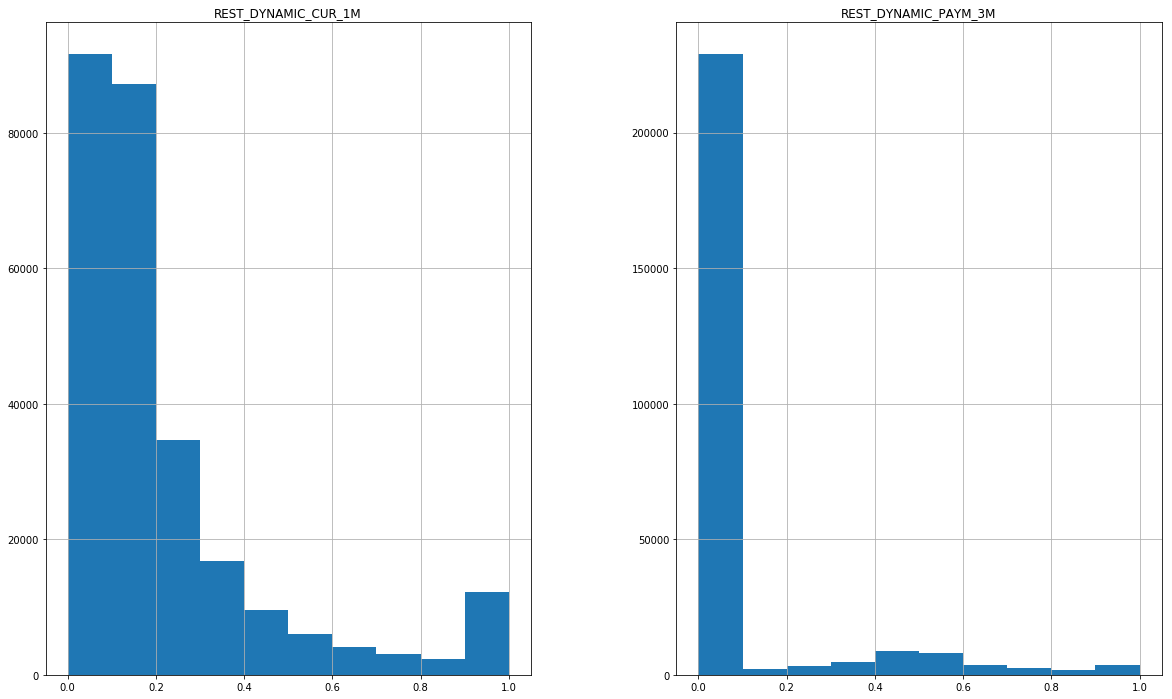

In [120]:
X_train[['REST_DYNAMIC_CUR_1M', 'REST_DYNAMIC_PAYM_3M']].hist(figsize=(20, 12))

In [124]:
X_train['TARGET'] = y_train

In [130]:
X_train['REST_DYNAMIC_PAYM_3M'].describe()

count    267724.000000
mean          0.076601
std           0.204098
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REST_DYNAMIC_PAYM_3M, dtype: float64

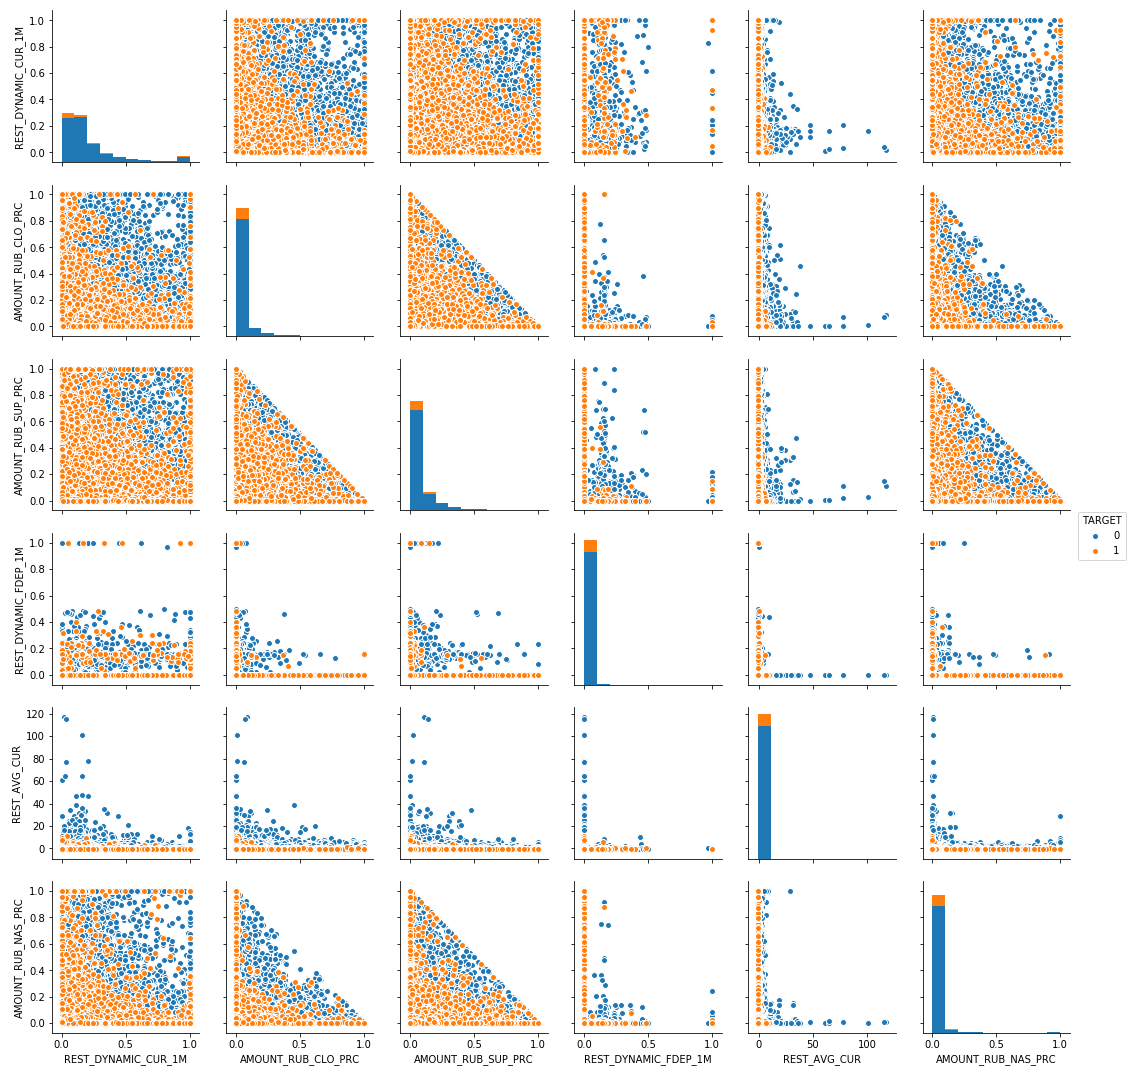

In [139]:
import seaborn as sns
#sns.heatmap(X_train)

sns.pairplot(X_train, hue="TARGET", vars=['REST_DYNAMIC_CUR_1M', 'AMOUNT_RUB_CLO_PRC', 
                                          'AMOUNT_RUB_SUP_PRC', 'REST_DYNAMIC_FDEP_1M',
                                          'REST_AVG_CUR', 'AMOUNT_RUB_NAS_PRC'])

In [ ]:
sns.pairplot(X_train, hue='TARGET');

In [ ]:
# with open('lab04.csv', 'w') as file:
#     file.write('id' + '\t' + 'target' + '\n')
#     id_num = 0
#     for item in pred[:,1]:   
#         file.write(str(test_id[id_num]).strip() + '\t' + str(item) + '\n')
#         id_num = id_num + 1

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
metrics.auc(fpr, tpr)
metrics.roc_auc_score(y_test, pred[:,1])

In [ ]:
matplotlib inline